In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from datetime import datetime
import calendar

In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/Mental Health blog dataset/beyondblue_depression.csv')
df_2 = pd.read_csv( "/content/drive/My Drive/Mental Health blog dataset/beyondblue_ptsd-trauma.csv" )
df_3 = pd.read_csv('/content/drive/My Drive/Mental Health blog dataset/beyondblue_anxiety.csv')
df_4 = pd.read_csv ('/content/drive/My Drive/Mental Health blog dataset/beyondblue_suicidal-thoughts-and-self-harm.csv')

In [ ]:
df_1.columns

Index(['Unnamed: 0', 'title', 'author', 'num posts by author', 'date',
       'num likes', 'post', 'category', 'is_reply'],
      dtype='object')

In [ ]:
def Year_plot (df) : 

  dates = df.date.to_numpy()
  C = Counter (dates)

  time = []
  for key in C : 
    time.append (datetime.strptime(key, '%d %B %Y'))
  time  = sorted (time)

  year_data = []
  temp = []
  Y = time[0].year
  year = [Y]
  for i in range (len(time)) :
    if time[i].year == Y :
      temp.append(C[time[i].strftime ("%d %B %Y")])
    else : 
      year_data.append (sum(temp))
      Y = time[i].year
      temp = [C[time[i].strftime ("%d %B %Y")]]
      year.append (Y)

  if temp : 
    year_data.append (sum (temp))

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  print (year, year_data)
  ax.bar( year, year_data)
  plt.plot()

In [ ]:
def Month_plot (df, cum) : 

  dates = df.date.to_numpy()
  C = Counter (dates)

  time = []
  for key in C : 
    time.append (datetime.strptime(key, '%d %B %Y'))
  time  = sorted (time)

  month_data = []
  temp = []
  M = time[0].month
  Month = [M]
  for i in range (len(time)) :
    if time[i].month == M :
      temp.append(C[time[i].strftime ("%d %B %Y")])
    else : 
      month_data.append (sum(temp))
      M = time[i].month
      temp = [C[time[i].strftime ("%d %B %Y")]]
      Month.append (M)

  if temp : 
    month_data.append (sum (temp))

 
  print (np.mean(np.array(month_data)))
  if cum :
    D = {} 
    for i in range (len(Month)) : 
      D[Month[i]] = D.get ( Month[i], 0 ) + month_data[i]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar (sorted (D.keys()), [D[i] for i in sorted (D.keys()) ] )
    plt.plot()
  else: 

    print (len(month_data), month_data)
    fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(15,8), )

    z = 0 
    Y = 2013
    for i in range(2): 
      for j in range (4) :  
          Year_data =month_data[12*z:12*(z+1)]
          ax[i, j].bar ([i for i in range (len(Year_data))], Year_data )
          ax[i, j].set_xlabel ("for year " + str (Y) ) 
          z += 1
          Y += 1
    plt.plot ()

In [ ]:
def DAY_PLOT (df) : 

  dates = df.date.to_numpy()
  C = Counter (dates)

  time = []
  for key in C : 
    time.append (datetime.strptime(key, '%d %B %Y'))
  time  = sorted (time)

  freq  = []
  for i in range (len(time)): 
    freq.append ( C[time[i].strftime ("%d %B %Y")] )

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar( [i for i in range (len(freq))], freq)
  plt.plot()

131.3793103448276
87 [14, 118, 120, 61, 82, 83, 162, 170, 208, 344, 82, 55, 43, 96, 191, 172, 215, 164, 206, 264, 113, 148, 116, 180, 107, 140, 105, 99, 109, 117, 96, 132, 170, 147, 103, 148, 114, 128, 93, 141, 65, 105, 149, 135, 111, 226, 97, 138, 158, 88, 109, 144, 109, 163, 175, 143, 108, 96, 107, 118, 145, 154, 98, 114, 114, 93, 130, 173, 134, 98, 115, 137, 146, 133, 142, 104, 117, 116, 182, 165, 130, 106, 98, 107, 209, 222, 48]


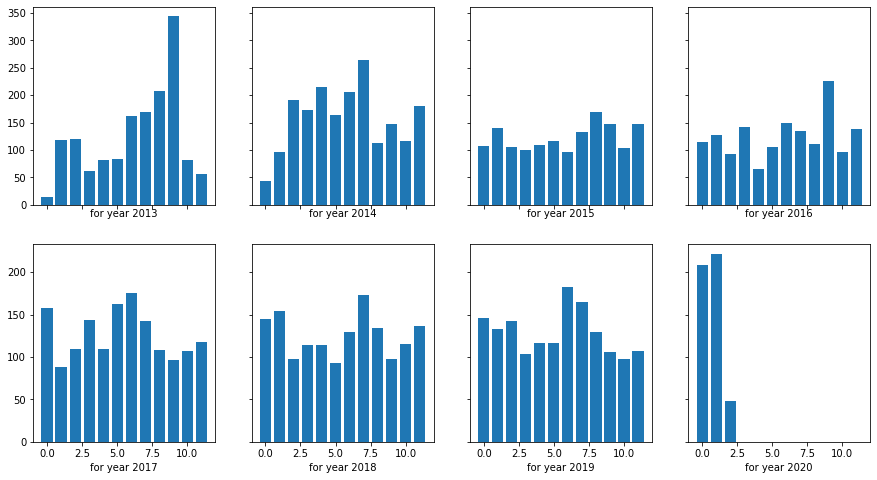

In [ ]:
Month_plot (df_1, 0 )

42.054794520547944
73 [0, 0, 5, 5, 0, 5, 2, 1, 4, 0, 5, 9, 8, 10, 2, 14, 16, 19, 29, 33, 9, 36, 37, 28, 12, 39, 55, 44, 24, 59, 37, 68, 79, 81, 61, 66, 54, 70, 42, 58, 46, 33, 27, 63, 27, 33, 32, 87, 40, 65, 57, 40, 61, 73, 62, 48, 57, 93, 42, 60, 93, 37, 48, 68, 96, 65, 40, 65, 46, 72, 117, 113, 38]


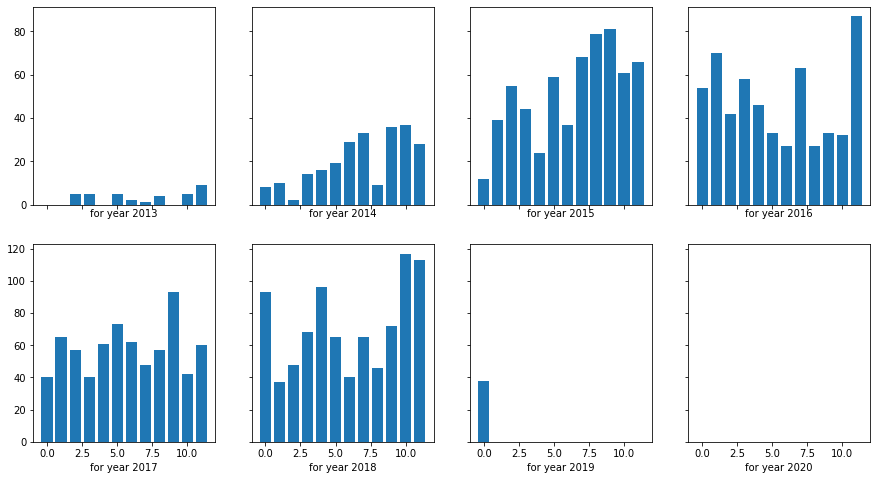

In [ ]:
Month_plot (df_2, 0 )

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] [1018, 1945, 1519, 1439, 1658, 1476, 1585, 790]


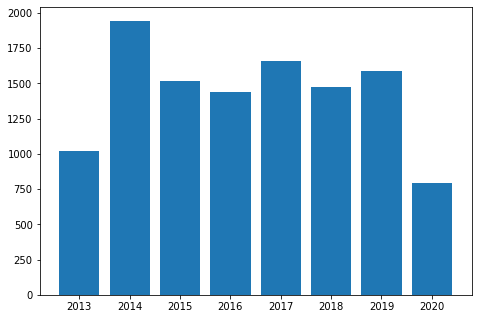

In [ ]:
Year_plot (df_1)

133.76923076923077
91 [2, 2, 9, 1, 13, 84, 44, 62, 52, 50, 70, 74, 64, 113, 83, 74, 77, 90, 103, 107, 47, 79, 130, 135, 54, 87, 93, 112, 93, 114, 95, 78, 112, 74, 89, 201, 130, 160, 78, 137, 65, 190, 97, 150, 89, 76, 100, 153, 158, 148, 162, 210, 142, 179, 165, 162, 174, 154, 245, 211, 120, 182, 149, 181, 158, 156, 186, 170, 163, 172, 239, 176, 229, 162, 153, 209, 271, 203, 221, 237, 210, 194, 223, 232, 194, 158, 195, 186, 219, 273, 50]


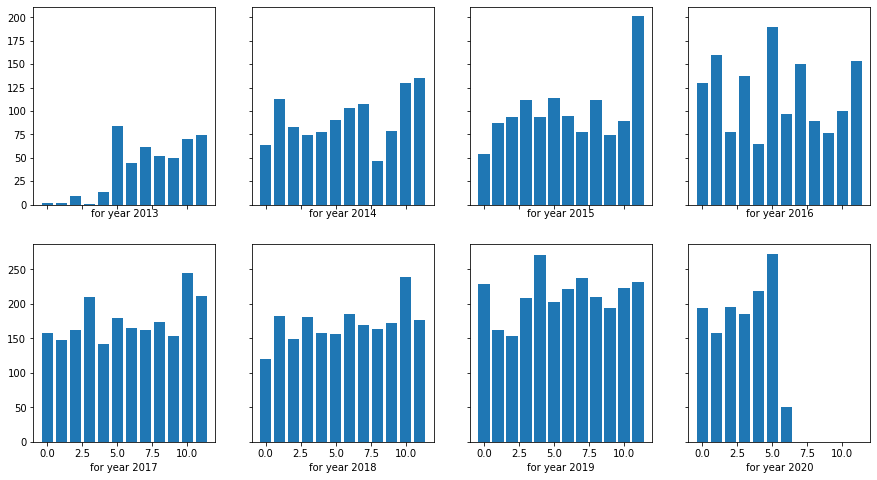

In [ ]:
Month_plot (df_3, 0 )

65.29411764705883
17 [5, 5, 4, 3, 4, 2, 2, 10, 30, 155, 134, 159, 167, 112, 151, 137, 30]


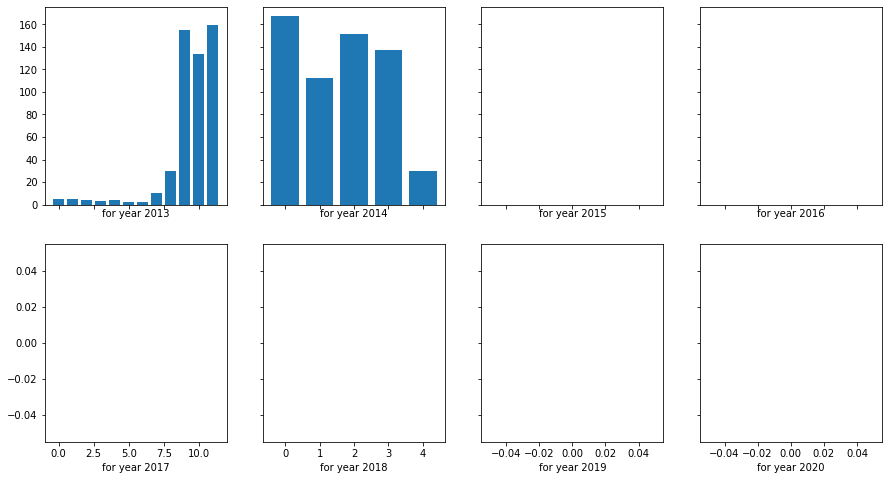

In [ ]:
Month_plot (df_4 , 0)

In [ ]:
# m_df_n = m_df [['author', 'num posts by author']].drop_duplicates()

In [ ]:
# new_df = df [['author', 'num posts by author']].drop_duplicates()

In [ ]:
# popo = m_df_n ['num posts by author'].to_numpy()

In [ ]:
# unique_name = []
# for i in L[:-1] : 
#   unique_name += i.author.unique().tolist()
# unique_name = np.unique(np.array(unique_name))

In [ ]:
# L = [df, df_2, df_3, df_4, df_5] 
# ans = 0
# Temp = []
# for k, name in enumerate (unique_name) :
#   ans = 0
#   for i in L : 
#     ans += i.loc[i['author'] == name].shape[0]
#   Temp.append ([popo[k], ans])

In [ ]:
# len(Temp)

9354

In [ ]:
# temp = []
# for l, j in enumerate (Temp) : 
#   temp.append ([int(j[0].split(" ")[0]) , j[1] ]) 

In [ ]:
# act_cnts = np.array(temp)
# act_cnts = act_cnts[act_cnts[:,1]<50]
# act_cnts = act_cnts[act_cnts[:,1]>5]
# print(len(act_cnts))

660
